# Visual Analytics of Employee Attrition and Workforce Dynamics

## Project Objective
Employee attrition is a critical challenge for organizations as it directly impacts productivity, costs, and workforce stability.  
The objective of this project is to analyze employee attrition patterns using a real-world HR dataset and uncover key factors that influence employees leaving an organization.

Using data visualization techniques, this project explores how variables such as department, job role, income, work-life balance, overtime, and age are related to employee attrition.  
The insights derived from this analysis can help organizations make data-driven decisions to improve employee retention.

In [2]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
df=pd.read_csv("IBM HR Employee Attrition Data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

In [6]:
df.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Data Cleaning and Preparation

Before performing the analysis, the dataset was checked for missing values, incorrect data types, and irrelevant columns to ensure accurate and reliable results.

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
#as we see there are no null values .So we can proceed further without any changes to be made 

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
#No duplicate records were found in the dataset, indicating that each employee entry is unique.


In [12]:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [13]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

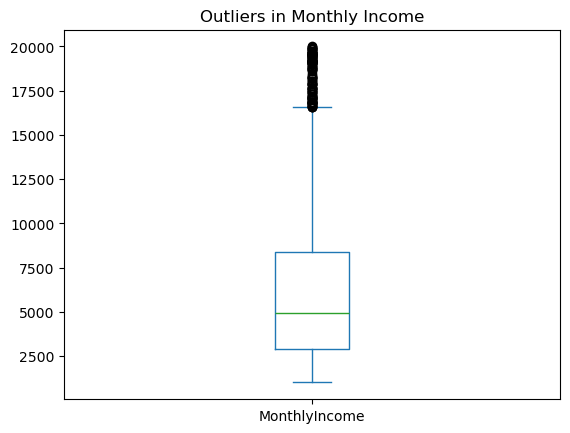

In [14]:
plt.figure()
df['MonthlyIncome'].plot(kind='box')
plt.title("Outliers in Monthly Income")
plt.show()

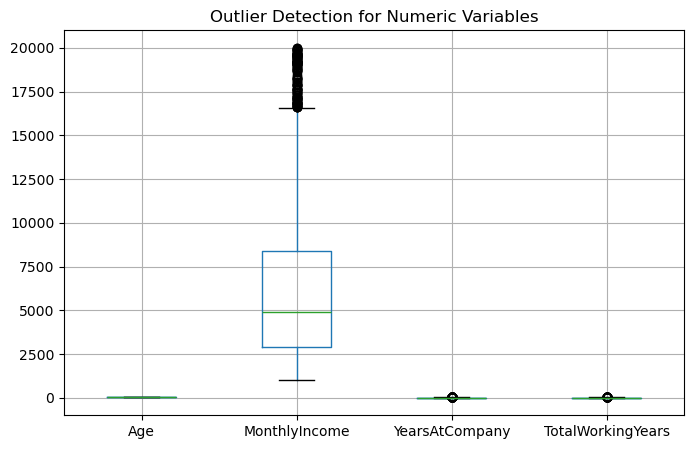

In [15]:
numeric_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears']

plt.figure(figsize=(8,5))
df[numeric_cols].boxplot()
plt.title("Outlier Detection for Numeric Variables")
plt.show()

**Outlier Analysis:**  
Boxplots were used to identify potential outliers in key numeric variables such as age, monthly income, and years at company.  
Outliers were observed, particularly in monthly income and total working years, representing employees with unusually high salaries or long work experience.  
These values were retained as they reflect valid real-world employee profiles rather than data errors.

# EXPLORATORY DATA ANALYSIS-EDA

# 1. How does employee attrition vary by job level?


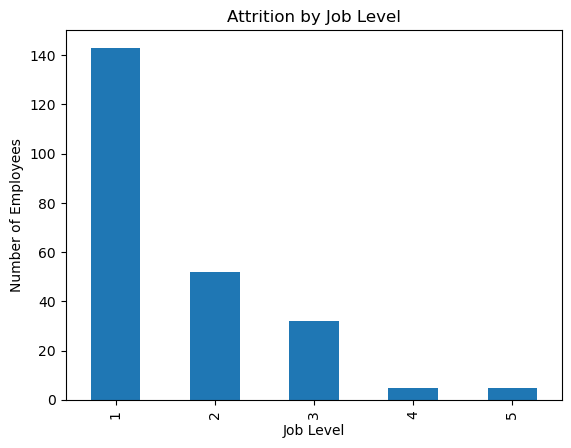

In [16]:
joblevel_attrition = df.groupby(['JobLevel', 'Attrition']).size().unstack()

joblevel_attrition['Yes'].plot(kind='bar')
plt.title("Attrition by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Number of Employees")
plt.show()


**Insights**

The results show that employees at lower job levels experience higher attrition compared to those at senior levels.  
This suggests that early-career employees may be more likely to leave due to factors such as compensation, role expectations, or limited growth opportunities.

## 2.How does employee attrition vary by department?

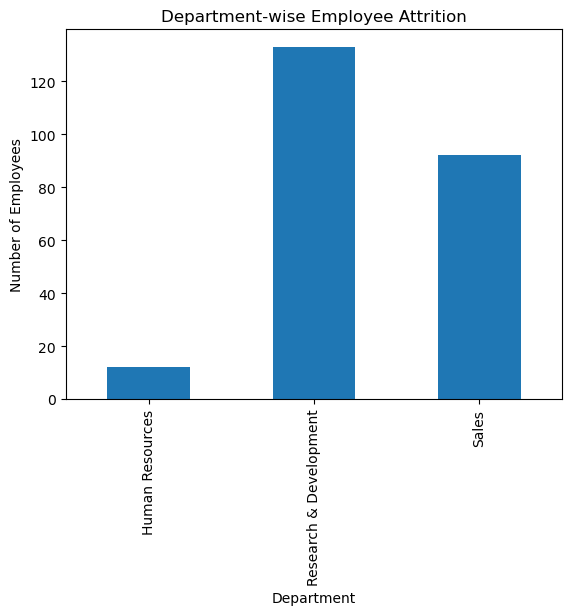

In [20]:
dept_attrition = df.groupby(['Department', 'Attrition']).size().unstack()

dept_attrition['Yes'].plot(kind='bar')
plt.title("Department-wise Employee Attrition")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()

**Insight:**  
The Sales department experiences the highest level of attrition, followed by Research & Development.  
This suggests department-specific challenges that may require targeted retention strategies.

## 3. Is employee attrition related to monthly income?

<Figure size 640x480 with 0 Axes>

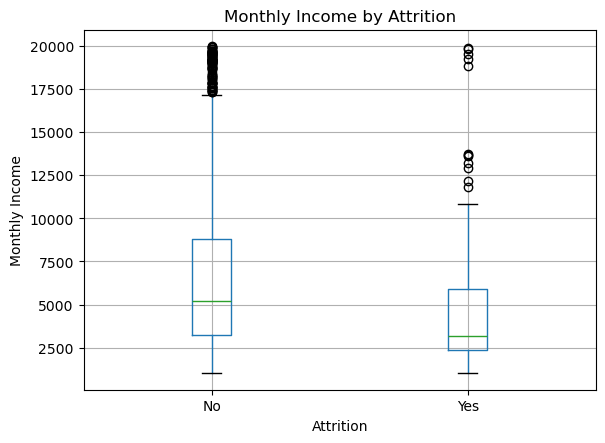

In [24]:
plt.figure()
df.boxplot(column='MonthlyIncome', by='Attrition')
plt.title("Monthly Income by Attrition")
plt.suptitle("")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

**Insight:**  
Employees who left the organization tend to have lower median monthly income than those who stayed.  
This suggests that compensation may play an important role in employee retention.


## 4.Does work-life balance affect employee attrition?

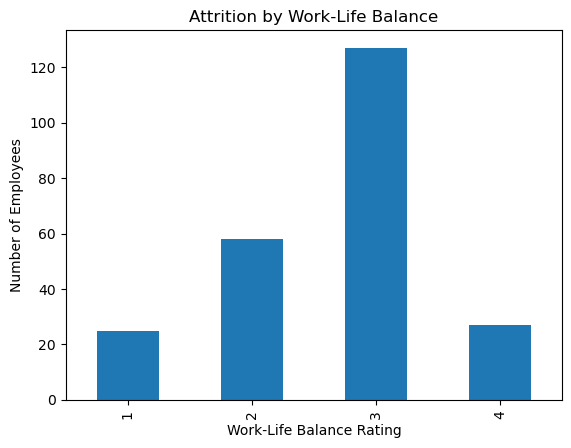

In [26]:
wlb_attrition = df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack()

wlb_attrition['Yes'].plot(kind='bar')
plt.title("Attrition by Work-Life Balance")
plt.xlabel("Work-Life Balance Rating")
plt.ylabel("Number of Employees")
plt.show()

**Insight:**  
Higher attrition is observed among employees with lower work-life balance ratings.  
This highlights the importance of maintaining a healthy balance between work and personal life to reduce turnover.

## 5.Is overtime associated with higher attrition?

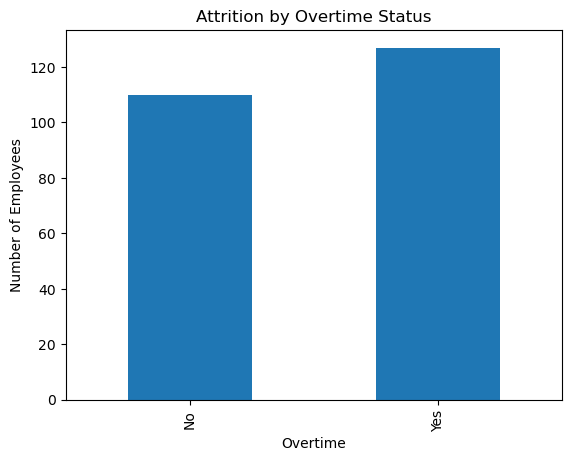

In [27]:
overtime_attrition = df.groupby(['OverTime', 'Attrition']).size().unstack()

overtime_attrition['Yes'].plot(kind='bar')
plt.title("Attrition by Overtime Status")
plt.xlabel("Overtime")
plt.ylabel("Number of Employees")
plt.show()

**Insight:**  
Employees who work overtime exhibit significantly higher attrition than those who do not.  
This suggests that excessive workload and burnout may contribute to employee turnover.

## 6.How does job satisfaction influence employee attrition?

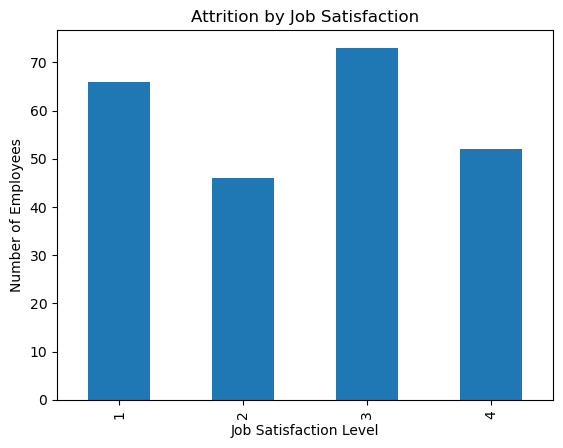

In [28]:
jobsat_attrition = df.groupby(['JobSatisfaction', 'Attrition']).size().unstack()

jobsat_attrition['Yes'].plot(kind='bar')
plt.title("Attrition by Job Satisfaction")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Number of Employees")
plt.show()

**Insight:**  
Employees with lower job satisfaction levels show higher attrition rates.  
This indicates that employee engagement and satisfaction are critical factors in retention.

## 7.How does employee attrition vary by marital status?

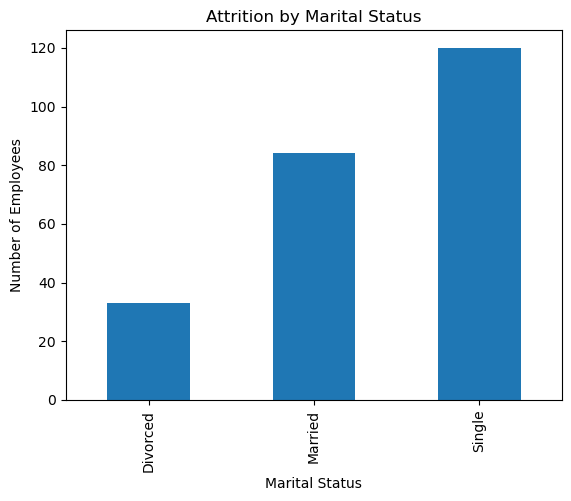

In [30]:
marital_attrition = df.groupby(['MaritalStatus', 'Attrition']).size().unstack()

marital_attrition['Yes'].plot(kind='bar')
plt.title("Attrition by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Employees")
plt.show()

**Insight:**  
The analysis shows that employees who are single experience higher attrition compared to married or divorced employees.  
This may suggest differences in career mobility, life stage priorities, or job stability across marital groups.

## 8.What characteristics define a high-risk employee profile?

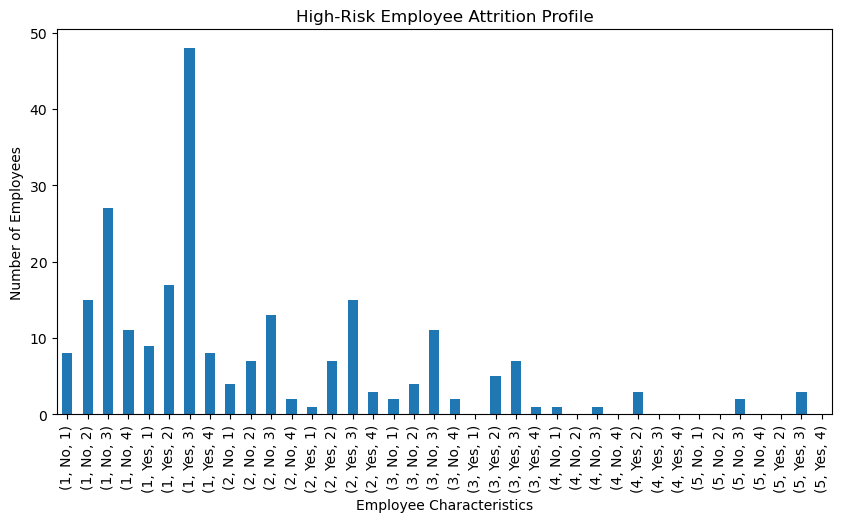

In [31]:
risk_profile = df.groupby(
    ['JobLevel', 'OverTime', 'WorkLifeBalance', 'Attrition']
).size().unstack()

risk_profile['Yes'].plot(kind='bar', figsize=(10,5))
plt.title("High-Risk Employee Attrition Profile")
plt.xlabel("Employee Characteristics")
plt.ylabel("Number of Employees")
plt.show()

**Insight:**  
Employees at lower job levels, working overtime, and reporting poor work-life balance form the highest-risk attrition group.  
These findings suggest that retention efforts should prioritize workload management, employee well-being, and career development.


## 9.How does tenure (years at company) relate to attrition?

<Figure size 640x480 with 0 Axes>

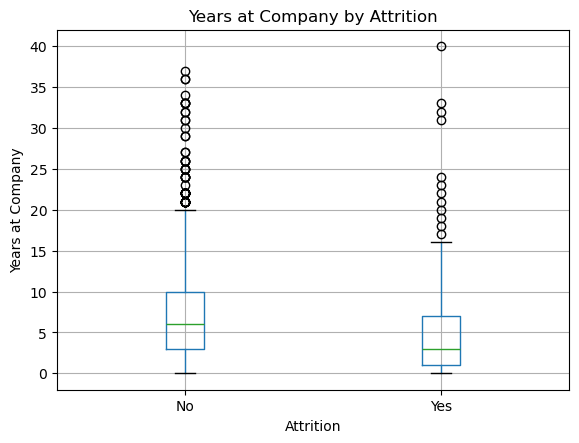

In [34]:
plt.figure()
df.boxplot(column='YearsAtCompany', by='Attrition')
plt.title("Years at Company by Attrition")
plt.suptitle("")
plt.xlabel("Attrition")
plt.ylabel("Years at Company")
plt.show()

**Insight:**  
Employees who leave the organization generally have fewer years at the company than those who stay.  
This indicates that attrition is more common during the early years of employment.

## 10.What is the overall employee attrition rate?

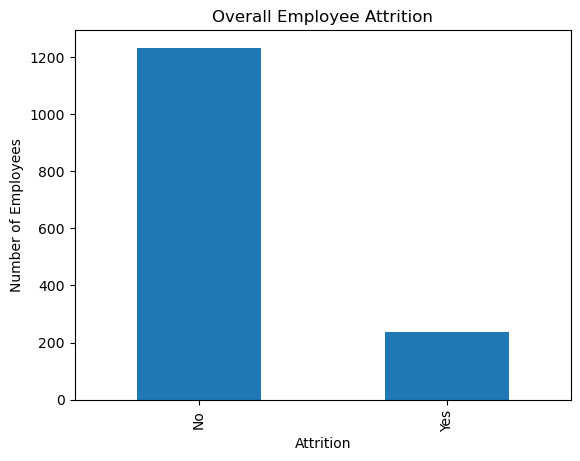

In [35]:
attrition_counts = df['Attrition'].value_counts()

plt.figure()
attrition_counts.plot(kind='bar')
plt.title("Overall Employee Attrition")
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.show()

**Insight:**  
The majority of employees have not left the organization, while a smaller proportion have experienced attrition.  
This indicates that although attrition exists, it affects a limited segment of the workforce, warranting further investigation into contributing factors.